In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams["figure.figsize"] = (12,8)

The SIR model decribes the spread of an infectious disease among a population.

Let $S$ be the number of susceptible people, $I$ be the number of infective people, and $R$ be the number of recovered people.Then the SIR equations read:

$$\color{blue}{\begin{aligned}
\frac{\mathrm{d} S}{\mathrm{d} t} & = -\beta SI\\
\frac{\mathrm{d} I}{\mathrm{d} t} & = \beta SI - \gamma I\\
\frac{\mathrm{d} R}{\mathrm{d} t} & = \gamma I\\
\end{aligned}}$$


The basic reproducive rate, defined as $\mathcal{R}_0 \equiv \frac{\beta N}{\gamma}$, is a key parameter that governs the behaviour of the model. Broadly speaking, $\mathcal{R}_0$ is an estimate of the number of individuals that are affected by a primary infective individual. If $\mathcal{R}_0 > 1$, then the infectious disease will develop into an epidemic.



However, the SIR model has its limitations. The SIR model only looks at the statistical expectation of the development of the groups, but each case of infection is probabilistic, and also each case of recovery is probabilistic, there could be unexpected fluctuations that lead to a very different overall picture.

Also, the number of each group is treated as continuous variables in the simple SIR model. But things like 0.7 patient do not make sense. So it would be more realistic to consider the numbers as discrete variables.

Here we present a probabilistic model based on the SIR model. Instead of a set of differential equations, we study the evolution of the groups in terms of a set of difference equations.

$$\color{blue}{\begin{aligned}
S[t+1] & = S[t] - N_\text{inf}[t] \\
I[t+1] & = I[t] + N_\text{inf}[t] - N_\text{rec}[t] \\
R[t+1] & = R[t] + N_\text{rec}[t]\\
\end{aligned}}$$

where the notation $x[t]$ represents the value of the quantity $x$ at day $t$, and $N_\text{inf}[t]$ and $N_\text{rec}[t]$ represent the number of new infection cases and the number of new recovery cases on that day.

To determine $N_\text{inf}[t]$, we adopt a dice rolling algorithm. For each possible contact between a susceptible person and an infectious patient, we generate a random number. If the number is less than the rate of infection $\beta$, then we say the susceptible will become infected. A similar approach is used to simulate $N_\text{rec}[t]$.

In [17]:
# set the size for the entire population
N = 5000

# simulation time
T = 40

In [18]:
def SIR_model(SIR_values, params):
    # return the S, I, R values for the next iteration
    # SIR model in terms of difference equations
    # SIR_values = [S, I, R]
    # params = [beta, gamma]
    new_infection = 0
    new_recovery = 0
    for i in range(SIR_values[1]):
        for s in range(SIR_values[0]):
            if random.random() < params[0]:
                new_infection += 1
        if random.random() < params[1]:
            new_recovery += 1
    S = SIR_values[0] - new_infection
    I = SIR_values[1] + new_infection - new_recovery
    R = SIR_values[2] + new_recovery
    if S < 0:
        S = 0
        I = SIR_values[1] + SIR_values[0] - new_recovery
    return [S, I, R]

In [19]:
def plot_SIR(gamma, r, N=5000, INIT_VALUES=(4999, 1, 0)):
    # plot the variation in time of the size of S/I/R groups 
    # r = basic reproductive rate
    # gamma = recovery rate
    S_values = [INIT_VALUES[0]]
    I_values = [INIT_VALUES[1]]
    R_values = [INIT_VALUES[2]]
    
    SIR_values = list(INIT_VALUES)
    beta = r * gamma / N

    for dummy in range(T):
        SIR_values = SIR_model(SIR_values, [beta, gamma])
        S_values.append(SIR_values[0])
        I_values.append(SIR_values[1])
        R_values.append(SIR_values[2])
    
    axes = plt.gca()
    axes.title.set_size(25)
    axes.xaxis.label.set_size(12)
    axes.yaxis.label.set_size(12)
    plt.plot(S_values, color = 'blue', label = 'Susceptible')
    plt.plot(I_values, color = 'red', label = 'Infective')
    plt.plot(R_values, color = 'green', label = 'Recovered')
    plt.title('SIR Model with $\mathcal{R}_0 = $' + str(r))
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Number')
    plt.show()

In [23]:
def SIR_T(gamma, r, N=5000, INIT_VALUES=(4999, 1, 0)):
    # find the total number of people that get infected during the epidemic at day T
    # r = basic reproductive rate
    # gamma = recovery rate
    SIR_values = list(INIT_VALUES)
    beta = r * gamma / N
    
    infected = [INIT_VALUES[1] + INIT_VALUES[2]]

    for dummy in range(T):
        SIR_values = SIR_model(SIR_values, [beta, gamma])
        infected.append(SIR_values[1] + SIR_values[2])
    
    return infected

In [25]:
def plot_scale(gamma, r, N=5000, INIT_VALUES=(4999, 1, 0), n=10):
    # given the same initial conditions, run simulation for n times
    axes = plt.gca()
    axes.title.set_size(25)
    axes.xaxis.label.set_size(12)
    axes.yaxis.label.set_size(12)
    plt.ylim(-N*0.05, N*1.05)
    
    for dummy in range(n):
        infected = SIR_T(gamma, r, N, INIT_VALUES)
        plt.plot(infected)

    plt.title('Total number of people that have been infected ($\mathcal{R}_0 = $' + str(r) + ')')
    plt.xlabel('day')
    plt.ylabel('number of people')
    plt.show()

Assume there is just one primary infectious person in the population.

Let's take a look at how the infectious disease spreads out from this patient.

Since this is a probabilistic model, you can run the simulation for multiple times. The result for each simulation can be significantly different.

In [26]:
I_0 = 1
R_0 = 0
S_0 = N - I_0 - R_0
INIT_VALUES = (S_0, I_0, R_0)

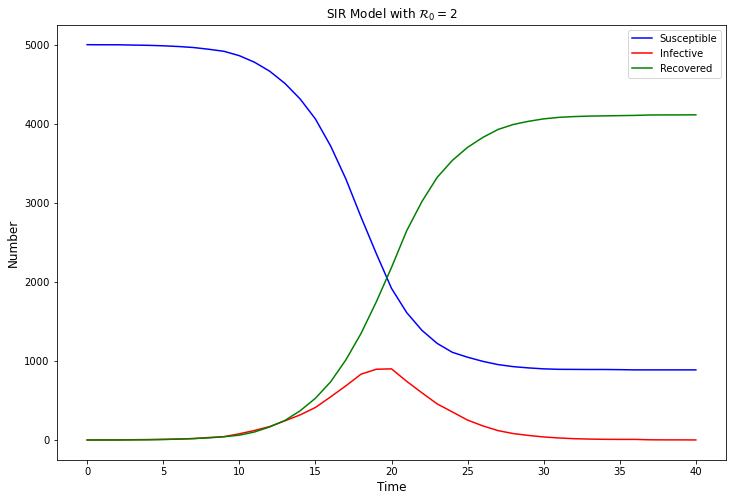

In [46]:
plot_SIR(0.5, 2, N, INIT_VALUES)

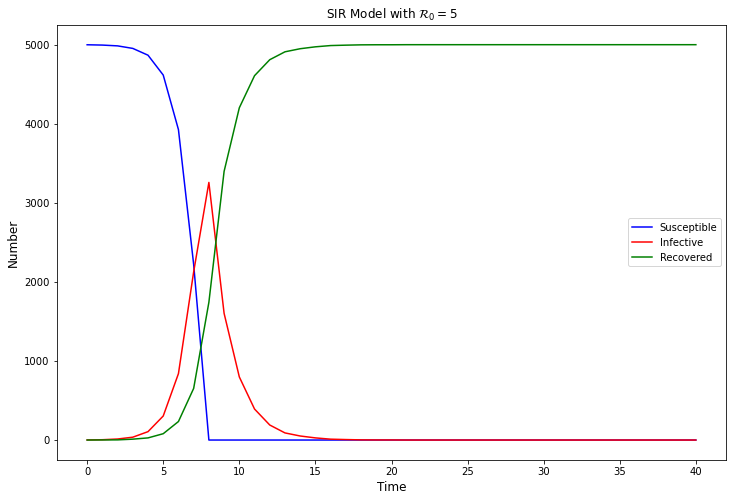

In [31]:
plot_SIR(0.5, 5, N, INIT_VALUES)

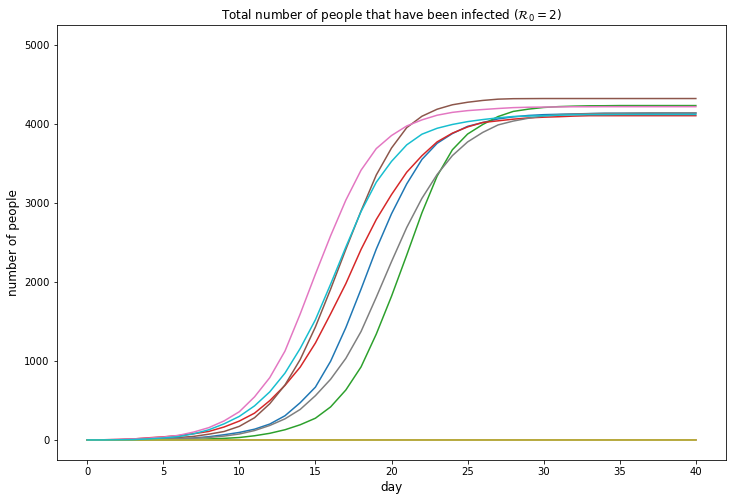

In [32]:
plot_scale(0.5, 2, N, INIT_VALUES, 10)

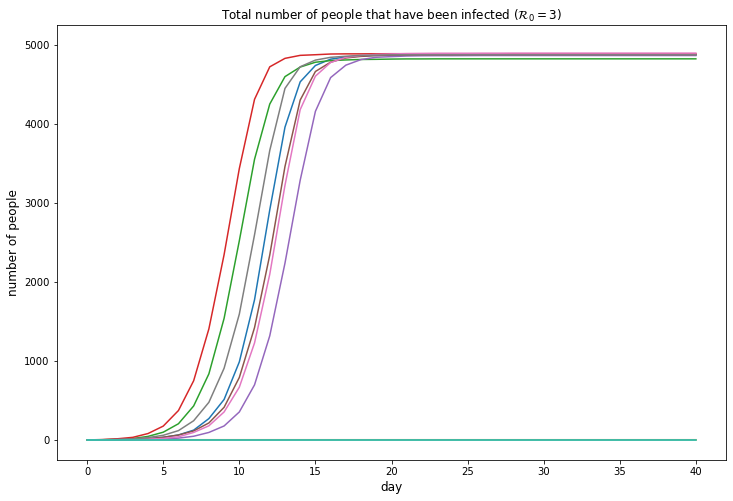

In [33]:
plot_scale(0.5, 3, N, INIT_VALUES, 10)

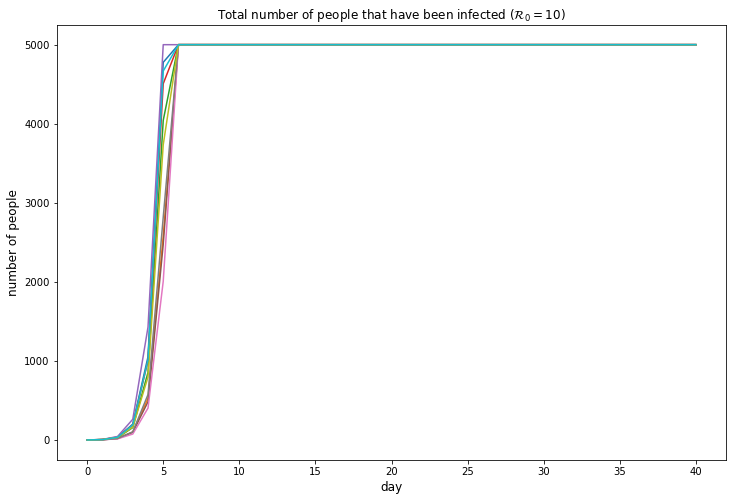

In [34]:
plot_scale(0.5, 10, N, INIT_VALUES, 10)